# Introduction 

In the following notebook, I will be exploring 2020_0505_Cleaned_Energy_Dataset.csv and the 2020_0505_Cleaned_Weather_Features.csv data files which contain time series data pertaining to energy consumption and weather in Spain respectively. In this notebook, I intend to find features and relationships worthy of exploring further with times series modeling techniques.

* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Original raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries for notebook**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [22]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')
font_title = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Set path to save visualizations
viz_path=r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Exploratory_Data_Analysis'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [23]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', 
                 parse_dates=['date_time'],index_col='date_time')

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **load**: actual electrical demand MWh
* **price**: price in EUR/MWh
* **temp**: hourly temperature(F) in Spain
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording


**Data Preview**

In [24]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 5)


,price,price_forecast,temp,load,load_forecast
date_time,,,,,
2015-01-01 00:00:00,65.41,50.10,30.814633,25385.0,26118.0
2015-01-01 01:00:00,64.92,48.10,30.852860,24382.0,24934.0
2015-01-01 02:00:00,64.48,47.33,30.108448,22734.0,23515.0
2015-01-01 03:00:00,59.32,42.27,30.091044,21286.0,22642.0
2015-01-01 04:00:00,56.04,38.41,30.192620,20264.0,21785.0


**About the Data**

In [25]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
              price  price_forecast          temp          load  load_forecast
count  35072.000000    35072.000000  35072.000000  35072.000000   35072.000000
mean      57.883167       49.873182     61.752442  28695.654824   28710.230469
std       14.202675       14.617667     13.069191   4577.180735    4595.299568
min        9.330000        2.060000     29.825352  18041.000000   18105.000000
25%       49.350000       41.490000     51.638000  24805.000000   24791.750000
50%       58.020000       50.520000     60.573200  28901.000000   28905.000000
75%       68.010000       60.530000     71.479400  32194.000000   32263.000000
max      116.800000      101.990000     97.008800  41015.000000   41390.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           35072 non

**Distributions of Price, Load, and Temp

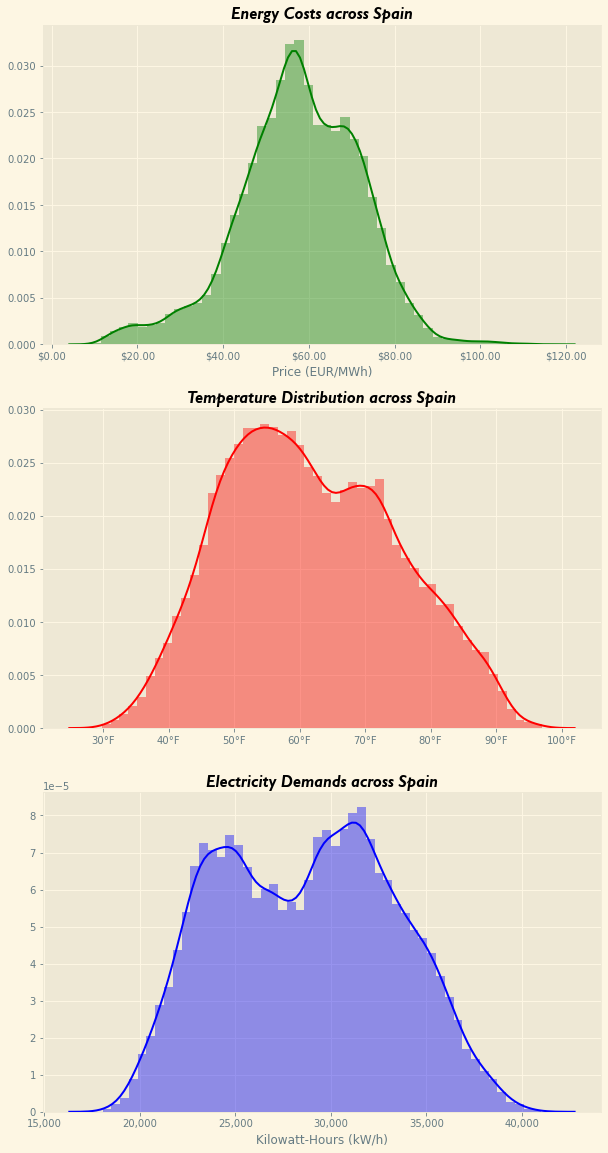

In [26]:
#Set figure
f, ax = plt.subplots(3,1, figsize = (10,20))

#Plot data
sns.distplot(df['price'],color = 'g',ax=ax[0])
sns.distplot(df['temp'],color = 'r', ax=ax[1])
sns.distplot(df['load'],color = 'b', ax = ax[2])

###Set plot aesthetics###
##Plot 1
ax[0].set_title('Energy Costs across Spain', fontdict = font_title)
ax[0].set_xlabel('Price (EUR/MWh)')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))

#Plot 2
ax[1].set_title('Temperature Distribution across Spain', fontdict = font_title)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].set_xlabel('')

##Plot 3
ax[2].set_title('Electricity Demands across Spain',fontdict = font_title)
ax[2].set_xlabel('Kilowatt-Hours (kW/h)')
ax[2].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# Exploratory Data Analysis

## Correlations

**Heat Map**

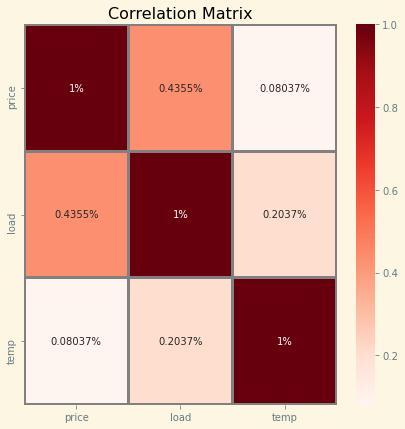

In [27]:
#Set plot
f, ax = plt.subplots(figsize = (7,7))

#Create correlation matrix
corr = df[['price','load','temp']].corr()

#Create heatmap
sns.heatmap(corr, annot=True,fmt='.4g',cmap = 'Reds', linewidths=2,annot_kws=None,
            linecolor='grey', ax = ax)

###Set plot aesthetics###
#Title
ax.set_title('Correlation Matrix')

#Format annotations
for t in ax.texts: t.set_text(t.get_text() + "%")
    
##Save fig##
plt.savefig(viz_path + '/Price/Correlation_Matrix.png',bbox_inches='tight')

**Pairplot**

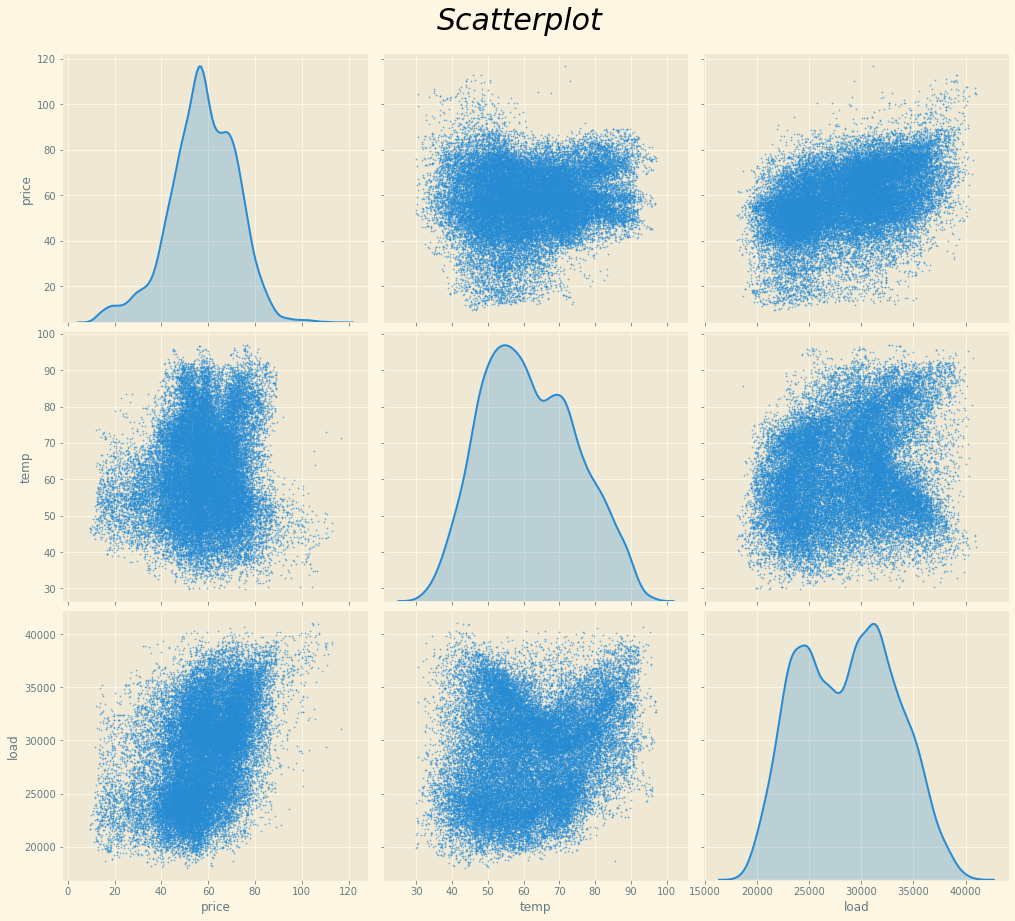

In [28]:
#Set font size for pairplot

#Plot data
j = sns.pairplot(df[['price', 'temp', 'load']],
                 plot_kws = {'alpha': 0.6, 's': 5, 'edgecolor': 'w',},
                 markers = '+',diag_kind='kde', height = 4, aspect = 1.15);

###Set plot aesthetics###
#Set Title
j.fig.suptitle("Scatterplot", y= 1.05, fontsize = 30, style = 'italic');

##Save fig##
plt.savefig(viz_path + '/Price/Scatter_plot.png',bbox_inches='tight')

## Raw time plots

## Price Data

**Time plots with smoothing**

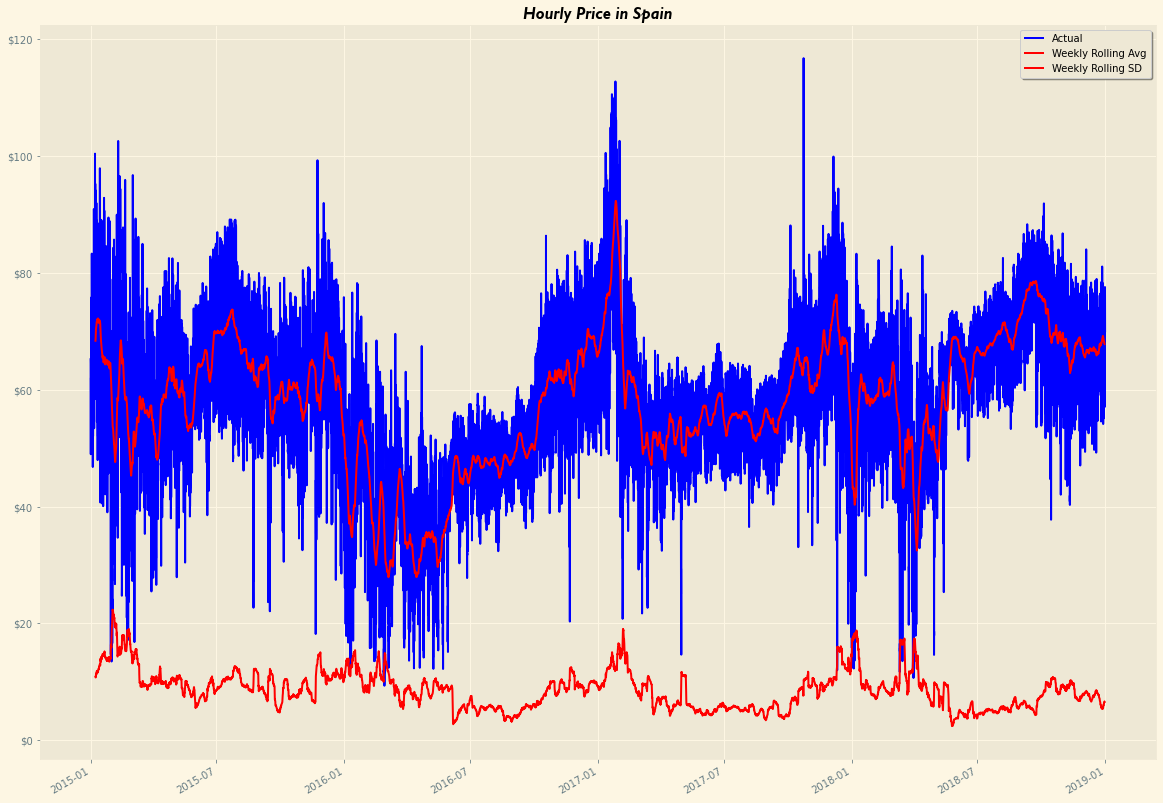

In [29]:
#Import timeseries_plot
from TimeseriesPlotter import timeseries_plot

#Set figure
fig, ax = plt.subplots(figsize = (20,15))

###Plot Data###
#Raw Data
timeseries_plot(df['price'],legend = True,label = 'Actual', color = 'b',ax =ax)

#Rolling Averages
timeseries_plot(df['price'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax)

#Rolling Standard Deviations
timeseries_plot(df['price'].rolling(24*7,24*7).std(),title='Hourly Price in Spain', title_dict=font_title,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax)

###Plot Aesthetics###
#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

##Save fig##
plt.savefig(viz_path + '/Price/Hourly_Price.png',bbox_inches='tight')

**ACF and PACF Plot**

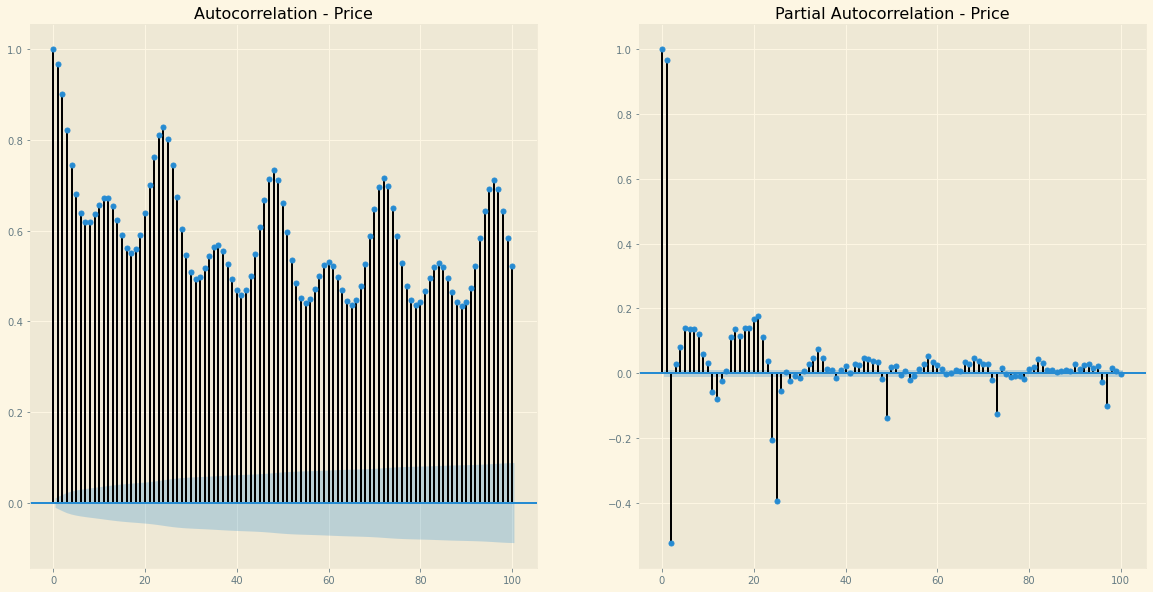

In [30]:
#Import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(1,2,figsize = (20,10))

#Fit to data
plot_acf(df.price, lags = 100, ax = ax[0], title ='Autocorrelation - Price')
plot_pacf(df.price, lags = 100, ax = ax[1], title='Partial Autocorrelation - Price');

##Save fig##
plt.savefig(viz_path + '/Price/ACF_PACF_Price.png',bbox_inches='tight')

**Decomposition model**

We'll shorten dataset to 180 days to get a better view of seasonality

In [31]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.price.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.price.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

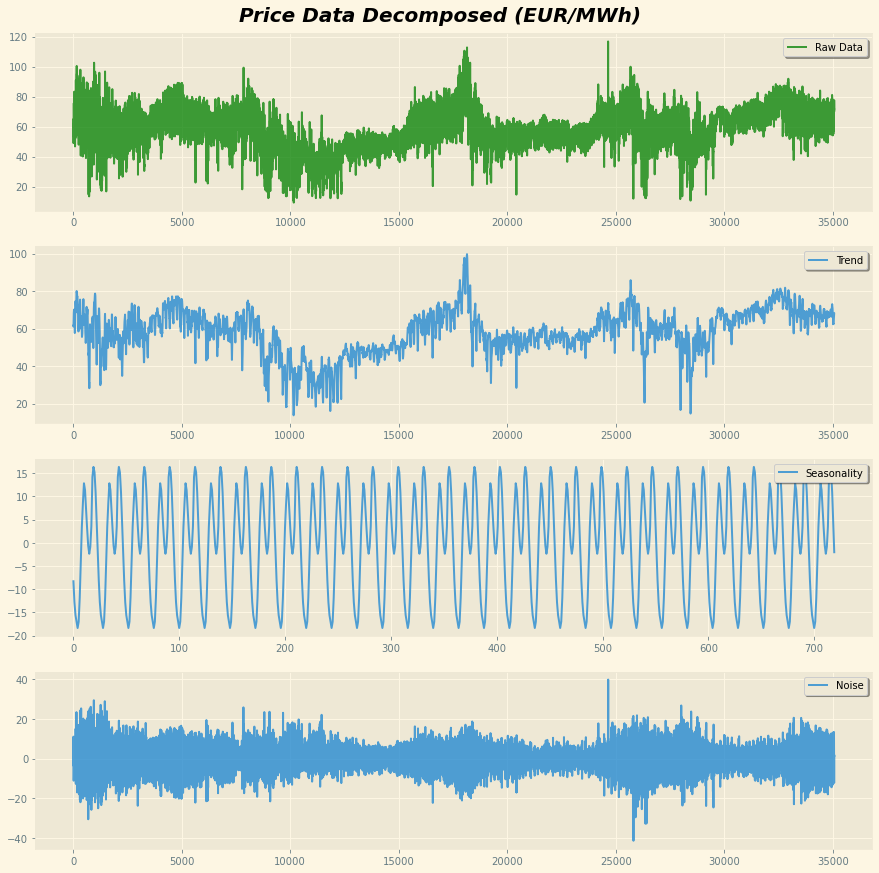

In [32]:
plt.figure(figsize=(15,15))

plt.suptitle('Price Data Decomposed (EUR/MWh)', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

##Save fig##
plt.savefig(viz_path + '/Price/Price_Decomposition.png',bbox_inches='tight')

## Temperature Data

**Time plots with smoothing**

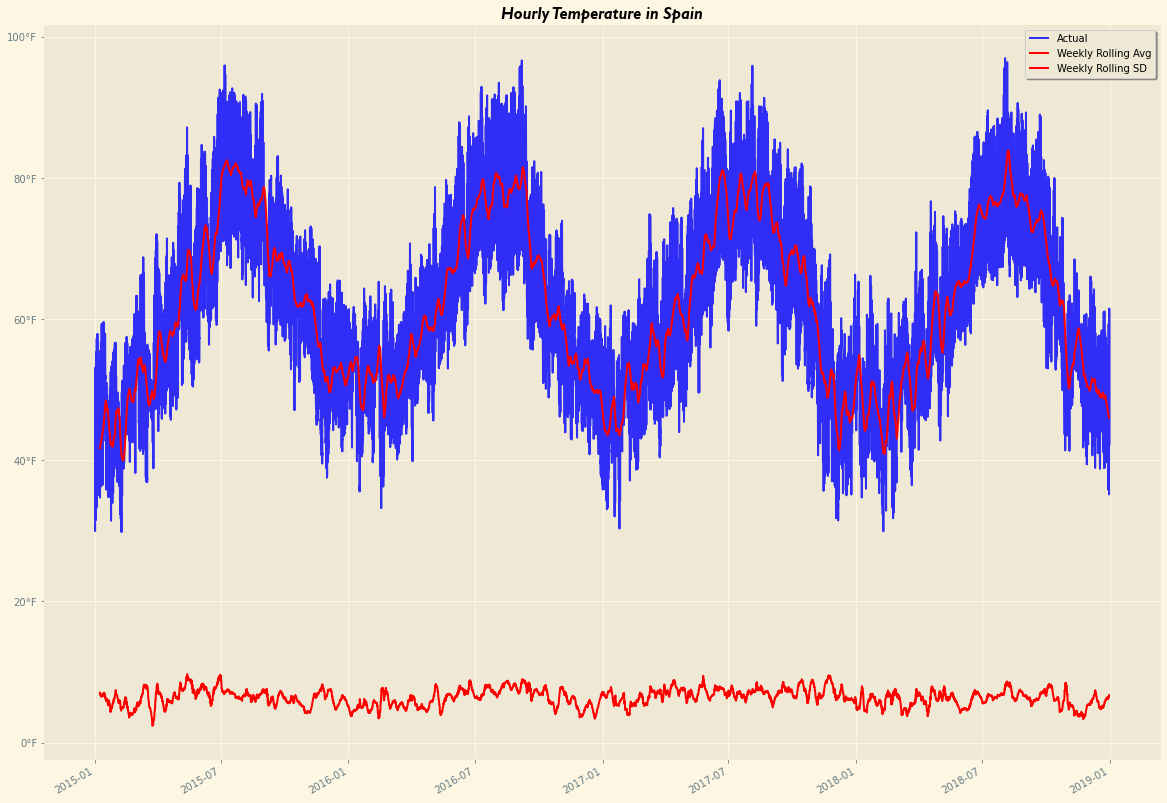

In [33]:
#Set figure
fig, ax = plt.subplots(figsize = (20,15))

###Plot Data###
#Raw Data
timeseries_plot(df['temp'],legend = True,label = 'Actual', alpha = .8,color = 'b',ax =ax)

#Rolling Averages
timeseries_plot(df['temp'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax)

#Rolling Standard Deviations

timeseries_plot(df['temp'].rolling(24*7,24*7).std(),title='Hourly Temperature in Spain', 
                title_dict=font_title ,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax)

###Plot Aesthetics###
#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

##Save fig##
plt.savefig(viz_path + '/Temperature/Hourly_Temp.png',bbox_inches='tight')

**ACF and PACF Plot**

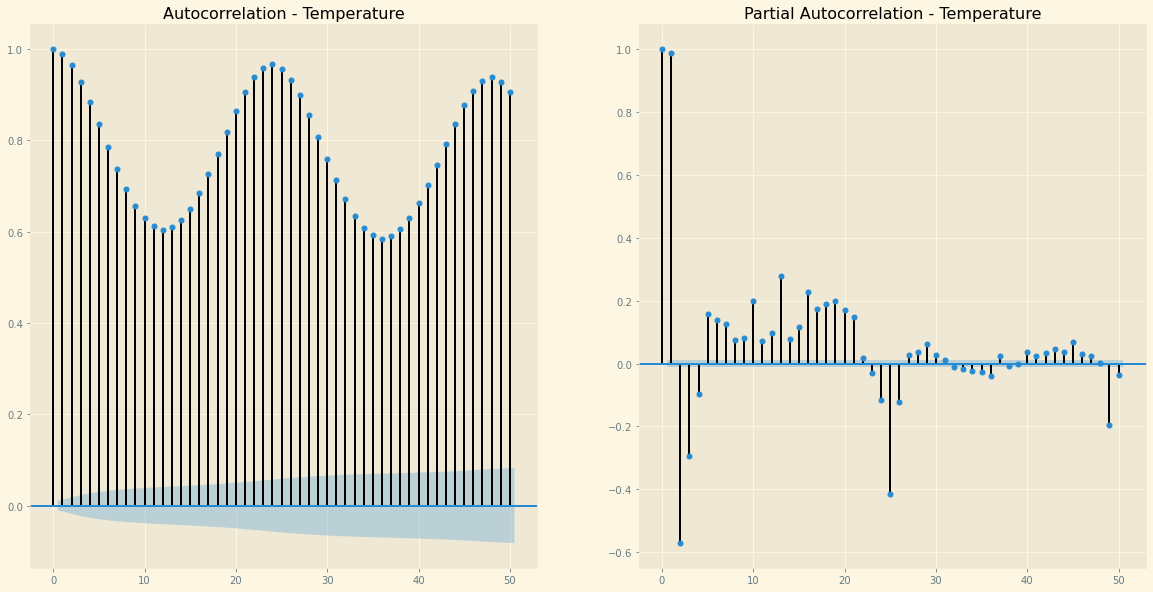

In [34]:
#Import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(1,2,figsize = (20,10))

#Fit to data
plot_acf(df.temp, lags = 50, ax = ax[0], title ='Autocorrelation - Temperature')
plot_pacf(df.temp, lags = 50, ax = ax[1], title='Partial Autocorrelation - Temperature');

##Save fig##
plt.savefig(viz_path + '/Temperature/ACF_PACF_Raw_Temp.png',bbox_inches='tight')

**Decomposition model**

We'll shorten dataset to 30 days to get a better view of seasonality

In [35]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.temp.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.temp.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

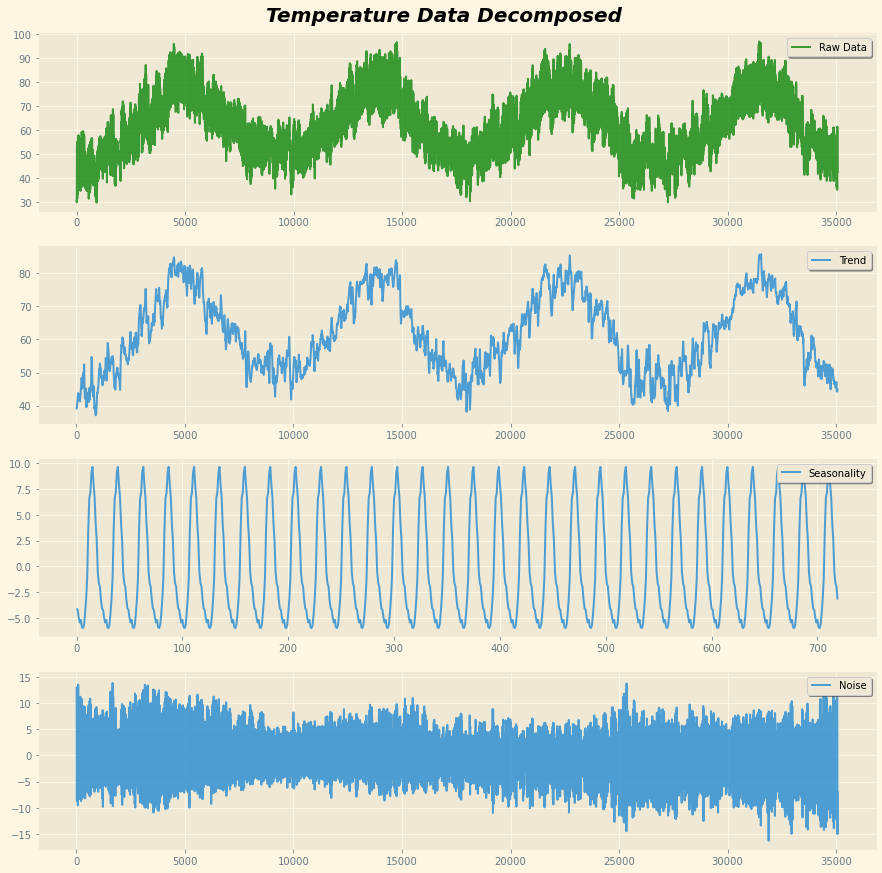

In [36]:
plt.figure(figsize=(15,15))

plt.suptitle('Temperature Data Decomposed', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

##Save fig##
plt.savefig(viz_path + '/Temperature/Hourly_Temp_Decomposed.png',bbox_inches='tight')

## Electricity Load 

**Time plots with smoothing**

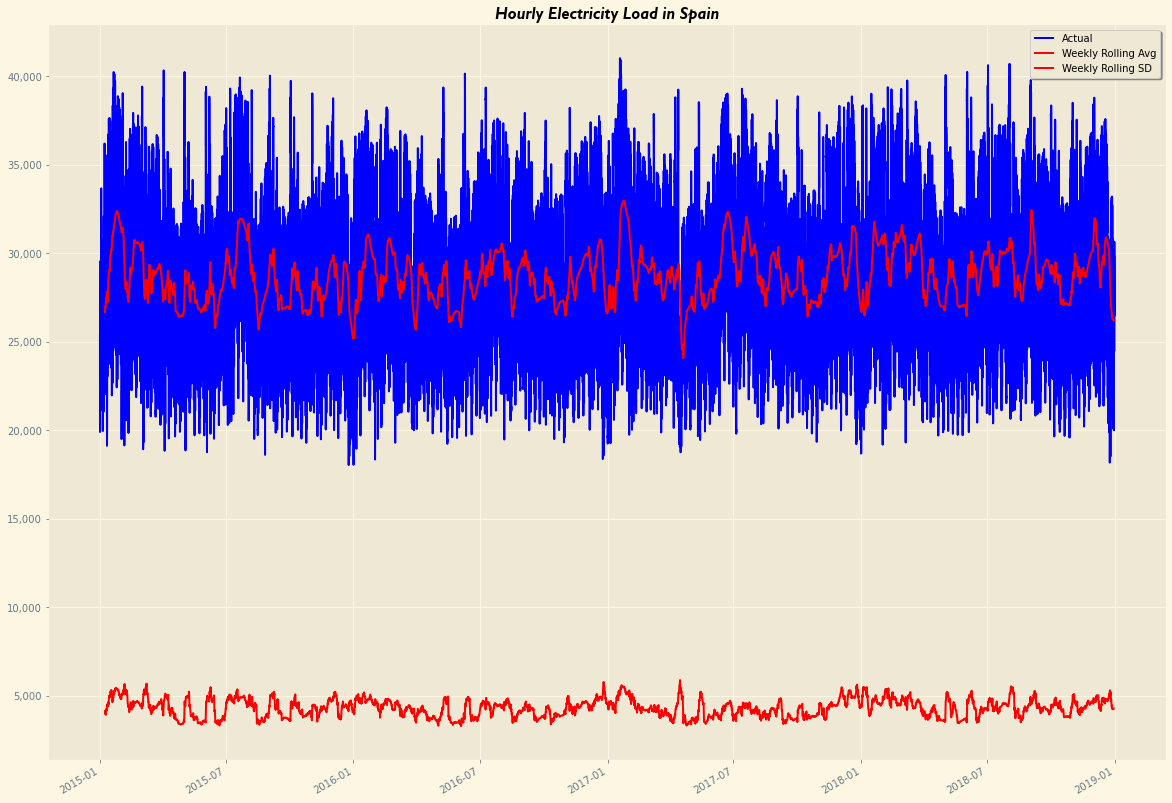

In [37]:
#Set figure
fig, ax = plt.subplots(figsize = (20,15))

###Plot Data###
#Raw Data
timeseries_plot(df['load'],legend = True,
                label = 'Actual', color = 'b',ax =ax)

#Rolling Averages
timeseries_plot(df['load'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax)

#Rolling Standard Deviations
timeseries_plot(df['load'].rolling(24*7,24*7).std(),title='Hourly Electricity Load in Spain', 
                title_dict=font_title ,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax)

###Plot Aesthetics###
#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

##Save fig##
plt.savefig(viz_path + '/Load/Hourly_Load.png',bbox_inches='tight')

**ACF and PACF Plot**

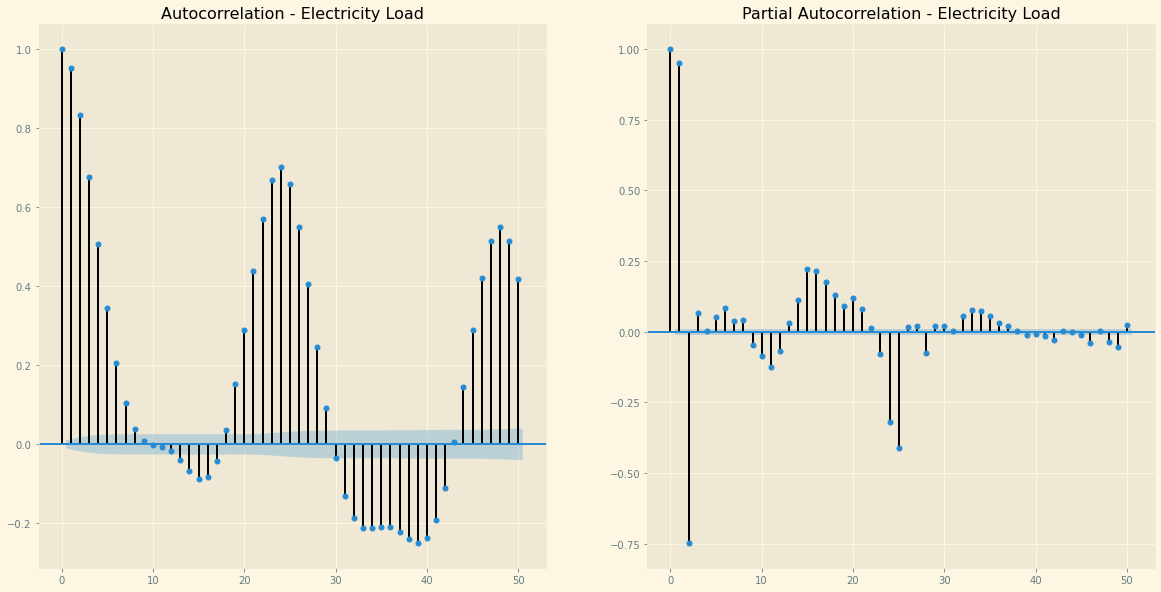

In [38]:
#Import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(1,2,figsize = (20,10))

#Fit to data
plot_acf(df.load, lags = 50, ax = ax[0], title ='Autocorrelation - Electricity Load')
plot_pacf(df.load, lags = 50, ax = ax[1], title='Partial Autocorrelation - Electricity Load');

##Save fig##
plt.savefig(viz_path + '/Load/ACF_PACF_Hourly_Load.png',bbox_inches='tight')

**Decomposition model**

In [39]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.load.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.load.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

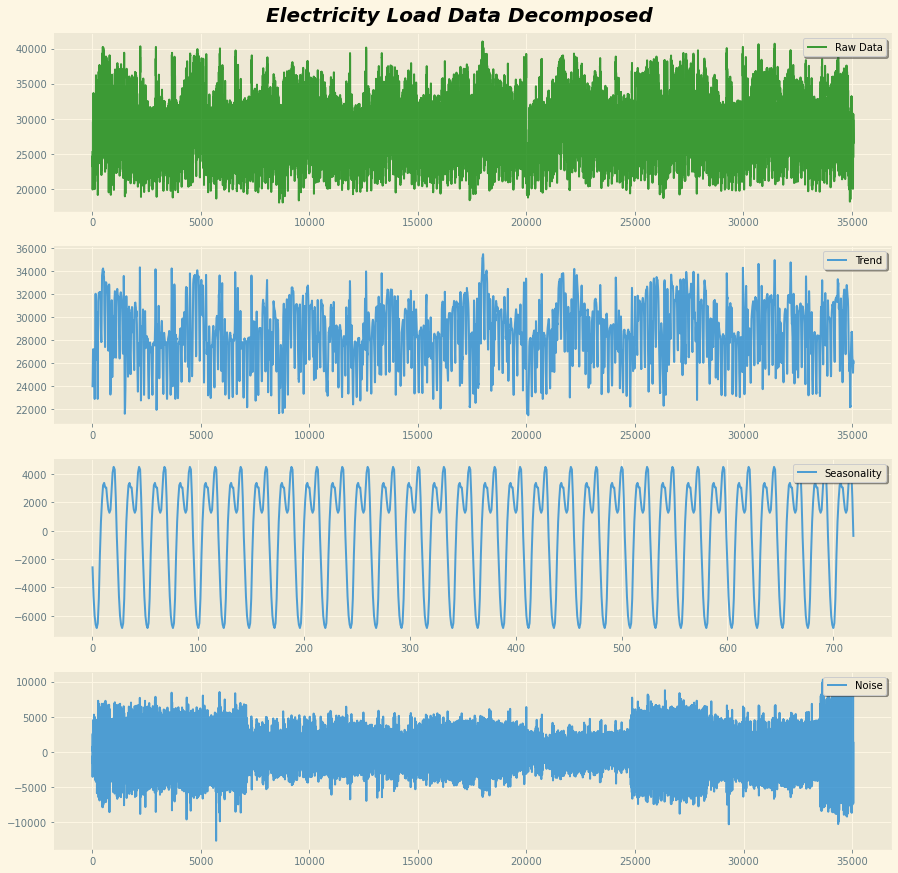

In [40]:
plt.figure(figsize=(15,15))

plt.suptitle('Electricity Load Data Decomposed', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

##Save fig##
plt.savefig(viz_path + '/Load/Hourly_Load_Decomposed.png',bbox_inches='tight')